# Data from kaggle

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import warnings
import cv2 as cv
import random

warnings.filterwarnings("ignore")

In [3]:
# I divided the main data set into 6 parts so it is easier to train
image_train_path = "data/the_main_data_yolo/part6/images/train/"
label_train_path = "data/the_main_data_yolo/part6/labels/train/"

image_val_path = "data/the_main_data_yolo//part6/images/val/"
label_val_path = "data/the_main_data_yolo/part6/labels/val/"

list_files_train = os.listdir(image_train_path)
list_files_val = os.listdir(image_val_path)

In [4]:
len(list_files_train), len(list_files_val)

(2231, 557)

In [5]:
random.shuffle(list_files_train)

In [6]:
random.shuffle(list_files_val)

In [7]:
x_train, y_train = [], []

In [8]:
for file_name in list_files_train:
    image = cv.resize(cv.imread(os.path.join(image_train_path, file_name)), (150, 150), interpolation=cv.INTER_AREA)
    x_train.append(image)

    with open(os.path.join(label_train_path, file_name[:-3] + "txt")) as label:
        rects_tmp = []
        
        for rect in label.readlines():
            rect = list(map(float, rect.split()))[1:]

            rect[0] -= rect[2] / 2
            rect[1] -= rect[3] / 2
            rect[2] += rect[0]
            rect[3] += rect[1]
            
            rects_tmp.append(rect)
        
        if rects_tmp:
            y_train.append(np.concatenate([np.array(rects_tmp), np.zeros((155 - len(rects_tmp), 4))]).flatten())
        else:
            y_train.append(np.zeros((155, 4)).flatten())
# preparing our train data

In [9]:
# max(list(map(len, y_train))), len(y_train[0][0]) 
# find the lenght of each instance in y_train
# I checked it in different parts of dataset and the biggest value was 153

In [10]:
x_train = np.array(x_train) / 255
y_train = np.array(y_train)

In [11]:
x_train.shape, y_train.shape

((2231, 150, 150, 3), (2231, 620))

In [12]:
x_val, y_val = [], []

In [13]:
for file_name in list_files_val:
    image = cv.resize(cv.imread(os.path.join(image_val_path, file_name)), (150, 150))
    x_val.append(image)

    with open(os.path.join(label_val_path, file_name[:-3] + "txt")) as label:
        rects_tmp = []
        
        for rect in label.readlines():
            rect = list(map(float, rect.split()))[1:]

            rect[0] -= rect[2] / 2
            rect[1] -= rect[3] / 2
            rect[2] += rect[0]
            rect[3] += rect[1]
            
            rects_tmp.append(rect)
        if rects_tmp:
            y_val.append(np.concatenate([np.array(rects_tmp), np.zeros((155 - len(rects_tmp), 4))]).flatten())
        else:
            y_val.append(np.zeros((155, 4)).flatten())
# preparing validation data

In [14]:
x_val = np.array(x_val) / 255
y_val = np.array(y_val)

In [15]:
x_val.shape, y_val.shape

((557, 150, 150, 3), (557, 620))

# Training

In [17]:
# Create a sequential neural network model
model_face_detection_01 = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(150, 150, 3)),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.MaxPooling2D(2),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.MaxPooling2D(2),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
                                               tf.keras.layers.BatchNormalization(),
                                               tf.keras.layers.Flatten(),
                                               tf.keras.layers.Dense(units=2048, activation="relu"),
                                               tf.keras.layers.Dense(units=1024, activation="relu"),
                                               tf.keras.layers.Dropout(0.2),
                                               tf.keras.layers.Dense(units=620, activation="sigmoid")
                                               ])
# Compile the model
model_face_detection_01.compile(optimizer=tf.keras.optimizers.Adam(),
                             loss=tf.keras.losses.Huber(),
                             metrics=["MAE"])

In [17]:
model_face_detection_01 = tf.keras.models.load_model("models/model_face_detection_01.h5")

In [20]:
model_face_detection_01.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 batch_normalization_10 (Bat  (None, 150, 150, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_11 (Bat  (None, 75, 75, 16)       64        
 chNormalization)                                                
                                                      

In [18]:
history = model_face_detection_01.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=32)

Epoch 1/15
70/70 [==============================] - 22s 303ms/step - loss: 0.0015 - MAE: 0.0077 - val_loss: 0.0016 - val_MAE: 0.0072
Epoch 2/15
70/70 [==============================] - 22s 317ms/step - loss: 0.0012 - MAE: 0.0069 - val_loss: 0.0016 - val_MAE: 0.0083
Epoch 3/15
70/70 [==============================] - 22s 317ms/step - loss: 9.4703e-04 - MAE: 0.0061 - val_loss: 0.0016 - val_MAE: 0.0074
Epoch 4/15
70/70 [==============================] - 22s 316ms/step - loss: 6.9846e-04 - MAE: 0.0049 - val_loss: 0.0016 - val_MAE: 0.0080
Epoch 5/15
70/70 [==============================] - 22s 316ms/step - loss: 4.9347e-04 - MAE: 0.0040 - val_loss: 0.0016 - val_MAE: 0.0079
Epoch 6/15
70/70 [==============================] - 22s 321ms/step - loss: 3.3738e-04 - MAE: 0.0032 - val_loss: 0.0016 - val_MAE: 0.0077
Epoch 7/15
70/70 [==============================] - 22s 319ms/step - loss: 2.4023e-04 - MAE: 0.0026 - val_loss: 0.0016 - val_MAE: 0.0082
Epoch 8/15
70/70 [==============================]

In [19]:
model_face_detection_01.save("models/model_face_detection_01.h5")

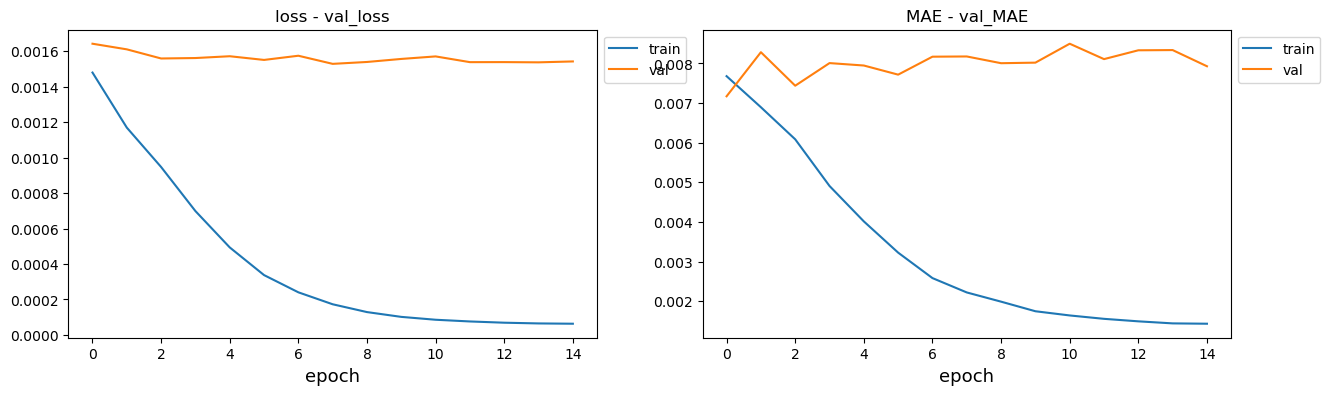

In [20]:
# plotting the history of training
fig, axis = plt.subplots(1, 2, figsize=(15, 4))

axis[0].plot(history.history["loss"], label="train")
axis[0].plot(history.history["val_loss"], label="val")
axis[0].set_title("loss - val_loss")
axis[0].set_xlabel("epoch", fontsize=13)
axis[0].legend(bbox_to_anchor=(1.0, 1.0))


axis[1].plot(history.history["MAE"], label="train")
axis[1].plot(history.history["val_MAE"], label="val")
axis[1].set_title("MAE - val_MAE")
axis[1].set_xlabel("epoch", fontsize=13)
axis[1].legend(bbox_to_anchor=(1.0, 1.0))


plt.show()

# Results

In [24]:
# feel free to change "i" (index of an example in the validation data)
i = 20


while True:
    img_tmp = x_val[i]
    
    pred = np.array(model_face_detection_01.predict(img_tmp[None] / 255)).reshape(155, 4)

    img_tmp = cv.resize(img_tmp, (600, 600), interpolation=cv.INTER_LINEAR)

    for rect in y_val[i].reshape((155, 4)):
        cv.rectangle(img_tmp, (int(rect[0] * 600), int(rect[1] * 600)), (int(rect[2] * 600), int(rect[3] * 600)), (200, 200, 200), thickness=3)

    for rect in pred:
        cv.rectangle(img_tmp, (int(rect[0] * 600), int(rect[1] * 600)), (int(rect[2] * 600), int(rect[3] * 600)), (0, 0, 0), thickness=3)

    cv.imshow("IMG (press q to quit)", img_tmp)

    if cv.waitKey(20) & 0xFF == ord("q"):
        break

cv.destroyAllWindows()
# black are predictions and white are actual labels

1/1 [==============================] - ETA: 0s

QObject::moveToThread: Current thread (0xa8b3080) is not the object's thread (0x9b0f3f0).
Cannot move to target thread (0xa8b3080)

QObject::moveToThread: Current thread (0xa8b3080) is not the object's thread (0x9b0f3f0).
Cannot move to target thread (0xa8b3080)

QObject::moveToThread: Current thread (0xa8b3080) is not the object's thread (0x9b0f3f0).
Cannot move to target thread (0xa8b3080)

QObject::moveToThread: Current thread (0xa8b3080) is not the object's thread (0x9b0f3f0).
Cannot move to target thread (0xa8b3080)

QObject::moveToThread: Current thread (0xa8b3080) is not the object's thread (0x9b0f3f0).
Cannot move to target thread (0xa8b3080)

QObject::moveToThread: Current thread (0xa8b3080) is not the object's thread (0x9b0f3f0).
Cannot move to target thread (0xa8b3080)

QObject::moveToThread: Current thread (0xa8b3080) is not the object's thread (0x9b0f3f0).
Cannot move to target thread (0xa8b3080)

QObject::moveToThread: Current thread (0xa8b3080) is not the object's thread

1/1 [==============================] - 0s 18ms/step


### As you can see our custome model cannot really train to fit such complex patterns as our data has but it actually perform reasonably well in real time

In [23]:
capture = cv.VideoCapture(0)

In [24]:
while True:
    isTrue, frame = capture.read()

    frame_pred = cv.resize(frame, (150, 150), interpolation=cv.INTER_AREA)
    
    pred = np.array(model_face_detection_01.predict(frame_pred[None] / 255)).reshape(155, 4)
    
    frame = cv.resize(frame, (1920, 1080), interpolation=cv.INTER_LINEAR)

    
    for rect in pred:
        cv.rectangle(frame, (int(rect[0] * 1920), int(rect[1] * 1080)), (int(rect[2] * 1920), int(rect[3] * 1080)), (200, 200, 200), thickness=2)

    
    cv.imshow("Video (press q to quit)", frame)
    
    if cv.waitKey(5) & 0xFF == ord('q'):
        break
        
capture.release()
cv.destroyAllWindows()
# use this code to check models performance in real time

1/1 [==============================] - 0s 19ms/step


QObject::moveToThread: Current thread (0xde97a20) is not the object's thread (0x8e227e0).
Cannot move to target thread (0xde97a20)

QObject::moveToThread: Current thread (0xde97a20) is not the object's thread (0x8e227e0).
Cannot move to target thread (0xde97a20)

QObject::moveToThread: Current thread (0xde97a20) is not the object's thread (0x8e227e0).
Cannot move to target thread (0xde97a20)

QObject::moveToThread: Current thread (0xde97a20) is not the object's thread (0x8e227e0).
Cannot move to target thread (0xde97a20)

QObject::moveToThread: Current thread (0xde97a20) is not the object's thread (0x8e227e0).
Cannot move to target thread (0xde97a20)

QObject::moveToThread: Current thread (0xde97a20) is not the object's thread (0x8e227e0).
Cannot move to target thread (0xde97a20)

QObject::moveToThread: Current thread (0xde97a20) is not the object's thread (0x8e227e0).
Cannot move to target thread (0xde97a20)

QObject::moveToThread: Current thread (0xde97a20) is not the object's thread

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


# Training

In [16]:
pretrained_model = tf.keras.applications.MobileNet(input_shape=(150, 150, 3), include_top=False)

for layer in pretrained_model.layers:
    layer.trainable = False

2023-09-16 13:00:52.249294: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-09-16 13:00:52.249312: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-16 13:00:52.249331: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (day): /proc/driver/nvidia/version does not exist
2023-09-16 13:00:52.250128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appr

In [17]:
pretrained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 75, 75, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 75, 75, 32)       128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 9, 9, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 9, 9, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 9, 9, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 9, 9, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 9, 9, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 9, 9, 512)         262144    
                                                                 
 conv_pw_9

In [34]:
# Create a sequential neural network model using a pretrained one
model_face_detection_02 = tf.keras.Sequential([pretrained_model,
                                               tf.keras.layers.Flatten(),
                                               tf.keras.layers.Dense(units=512, activation="selu"),
                                               tf.keras.layers.Dense(units=512, activation="selu"),
                                               tf.keras.layers.Dense(units=512, activation="selu"),
                                               tf.keras.layers.Dense(units=256, activation="selu"),
                                               tf.keras.layers.Dropout(0.2),
                                               tf.keras.layers.Dense(units=620, activation="sigmoid")
                                               ])
# Compile the model
model_face_detection_02.compile(optimizer=tf.keras.optimizers.Adam(),
                                loss=tf.keras.losses.Huber(),
                                metrics=["MAE"])

In [21]:
model_face_detection_02 = tf.keras.models.load_model("models/model_face_detection_02.h5")

In [20]:
model_face_detection_02.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_11 (Dense)            (None, 512)               8389120   
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                      

In [25]:
history = model_face_detection_02.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
70/70 [==============================] - 18s 250ms/step - loss: 3.1185e-04 - MAE: 0.0027 - val_loss: 0.0015 - val_MAE: 0.0064
Epoch 2/100
70/70 [==============================] - 18s 256ms/step - loss: 2.8688e-04 - MAE: 0.0026 - val_loss: 0.0014 - val_MAE: 0.0064
Epoch 3/100
70/70 [==============================] - 17s 245ms/step - loss: 2.5920e-04 - MAE: 0.0025 - val_loss: 0.0014 - val_MAE: 0.0064
Epoch 4/100
70/70 [==============================] - 17s 245ms/step - loss: 2.6079e-04 - MAE: 0.0025 - val_loss: 0.0015 - val_MAE: 0.0066
Epoch 5/100
70/70 [==============================] - 17s 244ms/step - loss: 2.3719e-04 - MAE: 0.0024 - val_loss: 0.0014 - val_MAE: 0.0064
Epoch 6/100
70/70 [==============================] - 17s 245ms/step - loss: 2.2900e-04 - MAE: 0.0023 - val_loss: 0.0014 - val_MAE: 0.0064
Epoch 7/100
70/70 [==============================] - 17s 245ms/step - loss: 2.2611e-04 - MAE: 0.0023 - val_loss: 0.0014 - val_MAE: 0.0066
Epoch 8/100
70/70 [===============

70/70 [==============================] - 18s 265ms/step - loss: 1.4251e-04 - MAE: 0.0018 - val_loss: 0.0015 - val_MAE: 0.0064
Epoch 61/100
70/70 [==============================] - 18s 264ms/step - loss: 1.5478e-04 - MAE: 0.0019 - val_loss: 0.0015 - val_MAE: 0.0065
Epoch 62/100
70/70 [==============================] - 18s 263ms/step - loss: 1.5869e-04 - MAE: 0.0019 - val_loss: 0.0015 - val_MAE: 0.0065
Epoch 63/100
70/70 [==============================] - 18s 264ms/step - loss: 1.4495e-04 - MAE: 0.0019 - val_loss: 0.0015 - val_MAE: 0.0067
Epoch 64/100
70/70 [==============================] - 19s 265ms/step - loss: 1.5514e-04 - MAE: 0.0019 - val_loss: 0.0015 - val_MAE: 0.0068
Epoch 65/100
70/70 [==============================] - 18s 257ms/step - loss: 1.5425e-04 - MAE: 0.0019 - val_loss: 0.0015 - val_MAE: 0.0065
Epoch 66/100
70/70 [==============================] - 17s 243ms/step - loss: 1.4271e-04 - MAE: 0.0019 - val_loss: 0.0015 - val_MAE: 0.0068
Epoch 67/100
70/70 [====================

#### This model gives us slightly better results

In [26]:
model_face_detection_02.save("models/model_face_detection_02.h5")

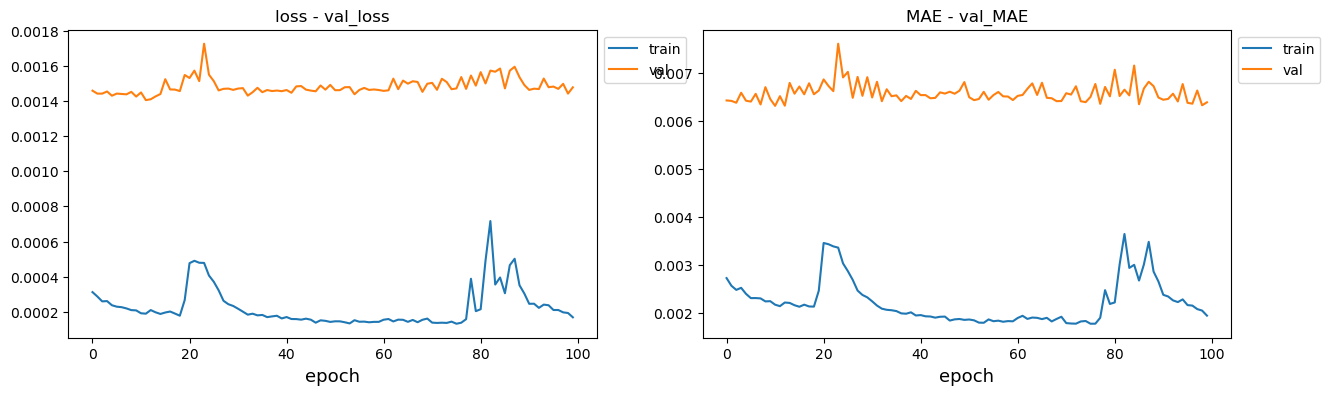

In [27]:
# plotting the history of training
fig, axis = plt.subplots(1, 2, figsize=(15, 4))

axis[0].plot(history.history["loss"], label="train")
axis[0].plot(history.history["val_loss"], label="val")
axis[0].set_title("loss - val_loss")
axis[0].set_xlabel("epoch", fontsize=13)
axis[0].legend(bbox_to_anchor=(1.0, 1.0))


axis[1].plot(history.history["MAE"], label="train")
axis[1].plot(history.history["val_MAE"], label="val")
axis[1].set_title("MAE - val_MAE")
axis[1].set_xlabel("epoch", fontsize=13)
axis[1].legend(bbox_to_anchor=(1.0, 1.0))


plt.show()

# Results

In [29]:
# feel free to change "i" you know what it is
i = 14


while True:
    img_tmp = x_val[i]

    pred = np.array(model_face_detection_02.predict(img_tmp[None] / 255)).reshape(155, 4)
    
    img_tmp = cv.resize(img_tmp, (600, 600), interpolation=cv.INTER_LINEAR)
    
    for rect in y_val[i].reshape((155, 4)):
        cv.rectangle(img_tmp, (int(rect[0] * 600), int(rect[1] * 600)), (int(rect[2] * 600), int(rect[3] * 600)), (200, 200, 200), thickness=3)

    for rect in pred:
        cv.rectangle(img_tmp, (int(rect[0] * 600), int(rect[1] * 600)), (int(rect[2] * 600), int(rect[3] * 600)), (0, 0, 0), thickness=3)

    cv.imshow("IMG (press q to quit)", img_tmp)

    if cv.waitKey(20) & 0xFF == ord("q"):
        break

cv.destroyAllWindows()

1/1 [==============================] - 0s 24ms/step


QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread

1/1 [==============================] - 0s 23ms/step


In [30]:
capture = cv.VideoCapture(0)

In [31]:
while True:
    isTrue, frame = capture.read()

    frame_pred = cv.resize(frame, (150, 150), interpolation=cv.INTER_AREA)
    
    pred = np.array(model_face_detection_02.predict(frame_pred[None] / 255)).reshape(155, 4)
    
    frame = cv.resize(frame, (1920, 1080), interpolation=cv.INTER_LINEAR)

    
    for rect in pred:
        cv.rectangle(frame, (int(rect[0] * 1920), int(rect[1] * 1080)), (int(rect[2] * 1920), int(rect[3] * 1080)), (200, 200, 200), thickness=2)

    
    cv.imshow("Video (press q to quit)", frame)
    
    if cv.waitKey(5) & 0xFF == ord('q'):
        break
        
capture.release()
cv.destroyAllWindows()

1/1 [==============================] - 0s 31ms/step


QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread (0xafb9750).
Cannot move to target thread (0xadd0dc0)

QObject::moveToThread: Current thread (0xadd0dc0) is not the object's thread

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step
